In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
import os, shutil, os.path

### Building The Network

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))   # "sigmoid"

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',            
              optimizer=optimizers.RMSprop(lr=5e-5),                
              metrics=['acc'])                         

### Data Preprocessing

In [9]:
train_dir = "../../02_Data/06_Test_Train_Val/train"
validation_dir = "../../02_Data/06_Test_Train_Val/val"

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        color_mode="grayscale",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        color_mode="grayscale",
        class_mode='categorical')

Found 16269 images belonging to 7 classes.
Found 1504 images belonging to 7 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 150, 150, 1)
labels batch shape: (40, 7)


In [12]:
train_generator.class_indices

{'com_high': 0,
 'com_med': 1,
 'ind_high': 2,
 'ind_office_med': 3,
 'res_high': 4,
 'res_low': 5,
 'res_med': 6}

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25, 
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/25
100/100 [==============================] - 97s 973ms/step - loss: 1.7659 - acc: 0.2885 - val_loss: 1.5204 - val_acc: 0.4325
Epoch 2/25
100/100 [==============================] - 93s 935ms/step - loss: 1.5464 - acc: 0.3524 - val_loss: 1.2473 - val_acc: 0.5383
Epoch 3/25
100/100 [==============================] - 91s 905ms/step - loss: 1.4765 - acc: 0.3862 - val_loss: 1.2122 - val_acc: 0.6363
Epoch 4/25
100/100 [==============================] - 88s 885ms/step - loss: 1.4549 - acc: 0.3985 - val_loss: 1.2775 - val_acc: 0.5255
Epoch 5/25
100/100 [==============================] - 88s 876ms/step - loss: 1.4279 - acc: 0.4270 - val_loss: 1.3379 - val_acc: 0.4462
Epoch 6/25
100/100 [==============================] - 87s 872ms/step - loss: 1.4254 - acc: 0.3979 - val_loss: 1.1255 - val_acc: 0.6301
Epoch 7/25
100/100 [==============================] - 88s 876ms/step - loss: 1.4053 - acc: 0.4220 - val_loss: 1.3012 - val_acc: 0.5287
Epoch 8/25
100/100 [==============================] - 8

Trained 5 Models and saved in sequence

In [15]:
model.save('las_vegas_CNN_Trained_12_Layers_Final_v5.h5')

Loss and Accuracy of the model over the training and validation data during training:

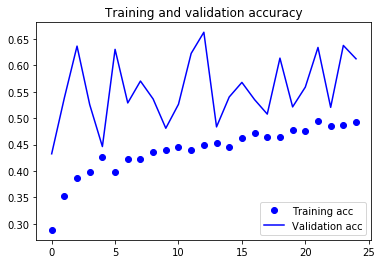

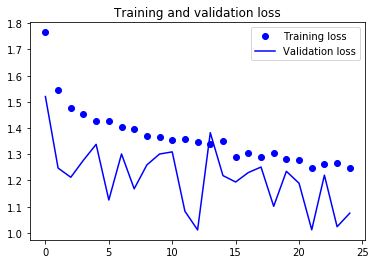

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()